In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
#Import Dataset to PD DF
dataset = pd.read_csv("C:\\Users\\Akanksha\\Downloads\\sledata.txt", sep = " ", header = None)

columns = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','D']
dataset.columns = columns
dataset

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,D
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1,1
2,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,0,0,0,1,0,0,0,1,1,1,2
296,1,0,1,1,0,0,0,0,1,1,1,2
297,0,0,0,1,1,1,0,0,0,1,1,2
298,1,0,1,0,1,1,1,1,0,1,1,2


In [26]:
#Seperating Label and Attributes
X= dataset.drop('D', axis =1)
y = dataset['D']

In [146]:
#Create test and train datasets from original dataset
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.30, random_state=3)

In [147]:
#call decision tree classifier for SKLearn
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion= 'gini')
clf.fit(X_trainset, y_trainset)

DecisionTreeClassifier()

In [148]:
#Check Decision Tree accuracy 
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred = clf.predict(X_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_pred))

DecisionTrees's Accuracy:  0.9666666666666667


In [149]:
#Check Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testset, y_pred))
print(classification_report(y_testset, y_pred))

[[49  0]
 [ 3 38]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        49
           2       1.00      0.93      0.96        41

    accuracy                           0.97        90
   macro avg       0.97      0.96      0.97        90
weighted avg       0.97      0.97      0.97        90



In [123]:
#Check Max Depth clf.tree_.max_depth

3

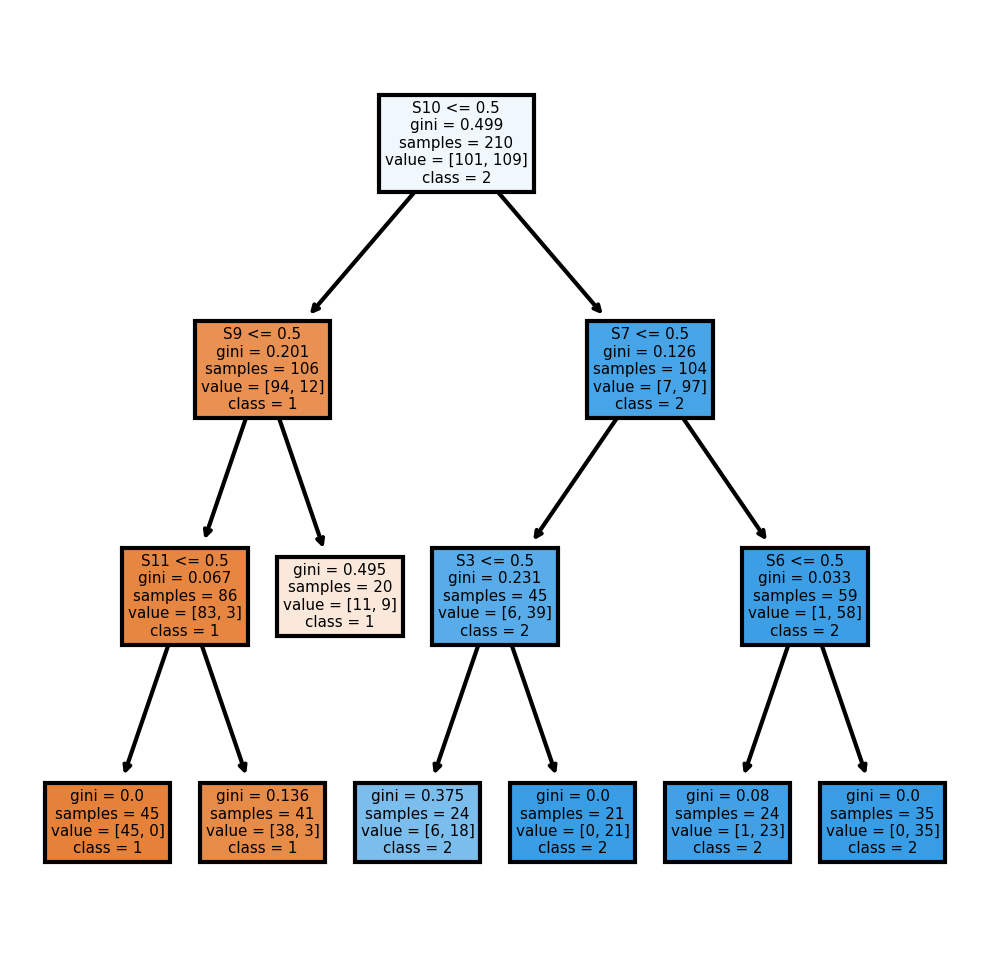

In [119]:
#Plot Decision Tree
fn=['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','D']
cn=['1','2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename-md3.png')

In [54]:
#Export Decision Treedot_data = export_graphviz(clf,
                           feature_names=X.columns,
                           out_file=None,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
nodes = graph.get_node_list()

graph.write_png('python_heart_disease_decision_tree.png')

True